<a href="https://colab.research.google.com/github/NvdSuni/Thesis-code-complete/blob/main/X_ray_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

import numpy as np
from PIL import Image
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model


Mounted at /content/drive


In [ ]:
# Print versions
print(f"numpy: {np.__version__}")
print(f"PIL (Pillow): {Image.__version__}")
print(f"tensorflow: {tf.__version__}")

numpy: 1.23.5
PIL (Pillow): 9.4.0
tensorflow: 2.14.0


In [ ]:
!pip install vit-keras
!pip install timm

In [ ]:
def get_image_paths(data_dir):
    image_paths = []
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image_paths.append(image_path)
    return image_paths

# Define the paths to the image directories for train, validation, and test
train_image_dir = '/content/drive/My Drive/Tilburg University/Thesis/Master Thesis/KneeXrayData/ClsKLData/kneeKL299/train'
val_image_dir = '/content/drive/My Drive/Master Thesis/KneeXrayData/ClsKLData/kneeKL299/val'
test_image_dir = '/content/drive/My Drive/Master Thesis/KneeXrayData/ClsKLData/kneeKL299/test'

# List image file paths in the directories for each set
train_image_paths = get_image_paths(train_image_dir)
val_image_paths = get_image_paths(val_image_dir)
test_image_paths = get_image_paths(test_image_dir)

num_classes = 5  # Number of classes

# Modify your label creation function to one-hot encode the labels
def create_labels(image_paths):
    labels = [int(image_path.split("/")[-2]) for image_path in image_paths]
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes)
    return labels

train_labels = create_labels(train_image_paths)
val_labels = create_labels(val_image_paths)
test_labels = create_labels(test_image_paths)
# Define the image size
image_size = (224, 224)

# Manual preprocessing for the training set
preprocessed_train_data = []
for image_path in train_image_paths:
    with Image.open(image_path) as image:
        image = image.resize(image_size, Image.LANCZOS)
        preprocessed_train_data.append(np.array(image) / 255.0)

# Manual preprocessing for the validation set
preprocessed_val_data = []
for image_path in val_image_paths:
    with Image.open(image_path) as image:
        image = image.resize(image_size, Image.LANCZOS)
        preprocessed_val_data.append(np.array(image) / 255.0)

# Manual preprocessing for the test set
preprocessed_test_data = []
for image_path in test_image_paths:
    with Image.open(image_path) as image:
        image = image.resize(image_size, Image.LANCZOS)
        preprocessed_test_data.append(np.array(image) / 255.0)

# Save preprocessed data and labels for each set
np.save('/content/drive/My Drive/Master Thesis/KneeXrayData/preprocessed_train_data.npy', np.array(preprocessed_train_data))
np.save('/content/drive/My Drive/Master Thesis/KneeXrayData/preprocessed_val_data.npy', np.array(preprocessed_val_data))
np.save('/content/drive/My Drive/Master Thesis/KneeXrayData/preprocessed_test_data.npy', np.array(preprocessed_test_data))
np.save('/content/drive/My Drive/Master Thesis/KneeXrayData/preprocessed_train_labels.npy', np.array(train_labels))
np.save('/content/drive/My Drive/Master Thesis/KneeXrayData/preprocessed_val_labels.npy', np.array(val_labels))
np.save('/content/drive/My Drive/Master Thesis/KneeXrayData/preprocessed_test_labels.npy', np.array(test_labels))


In [ ]:
def get_image_paths(data_dir):
    image_paths = []
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            image_paths.append(image_path)
    return image_paths

# Define the paths to the image directories for train, validation, and test
train_image_dir = '/content/drive/My Drive/Tilburg University/Thesis/Master Thesis/KneeXrayData/ClsKLData/kneeKL224/train'
val_image_dir = '/content/drive/My Drive/Tilburg University/Thesis/Master Thesis/KneeXrayData/ClsKLData/kneeKL224/val'
test_image_dir = '/content/drive/My Drive/Tilburg University/Thesis/Master Thesis/KneeXrayData/ClsKLData/kneeKL224/test'

# List image file paths in the directories for each set
train_image_paths = get_image_paths(train_image_dir)
val_image_paths = get_image_paths(val_image_dir)
test_image_paths = get_image_paths(test_image_dir)

num_classes = 5  # Number of classes

# Modify your label creation function to one-hot encode the labels
def create_labels(image_paths):
    labels = [int(image_path.split("/")[-2]) for image_path in image_paths]
    labels = np.array(labels)
    labels = to_categorical(labels, num_classes)
    return labels

train_labels_224 = create_labels(train_image_paths)
val_labels_224 = create_labels(val_image_paths)
test_labels_224 = create_labels(test_image_paths)
# Define the image size
image_size = (224, 224)

# Manual preprocessing for the training set
preprocessed_train_data_224 = []
for image_path in train_image_paths:
    with Image.open(image_path) as image:
        image = image.resize(image_size, Image.LANCZOS)
        preprocessed_train_data_224.append(np.array(image) / 255.0)

# Manual preprocessing for the validation set
preprocessed_val_data_224 = []
for image_path in val_image_paths:
    with Image.open(image_path) as image:
        image = image.resize(image_size, Image.LANCZOS)
        preprocessed_val_data_224.append(np.array(image) / 255.0)

# Manual preprocessing for the test set
preprocessed_test_data_224 = []
for image_path in test_image_paths:
    with Image.open(image_path) as image:
        image = image.resize(image_size, Image.LANCZOS)
        preprocessed_test_data_224.append(np.array(image) / 255.0)

# Save preprocessed data and labels for each set
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_train_data_224.npy', np.array(preprocessed_train_data_224))
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_val_data_224.npy', np.array(preprocessed_val_data_224))
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_test_data_224.npy', np.array(preprocessed_test_data_224))
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_train_labels_224.npy', np.array(train_labels_224))
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_val_labels_224.npy', np.array(val_labels_224))
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_test_labels_224.npy', np.array(test_labels_224))



NameError: ignored

In [ ]:
# preprocessed_train_data = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_train_data.npy')
# preprocessed_val_data = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_val_data.npy')
# preprocessed_test_data = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_test_data.npy')
train_labels = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_train_labels.npy')
val_labels = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_val_labels.npy')
test_labels = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_test_labels.npy')

FileNotFoundError: ignored

In [ ]:
preprocessed_train_data_224 = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_train_data_224.npy')
preprocessed_val_data_224 = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_val_data_224.npy')
preprocessed_test_data_224 = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_test_data_224.npy')
train_labels_224 = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_train_labels_224.npy')
val_labels_224 = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_val_labels_224.npy')
test_labels_224 = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_test_labels_224.npy')

In [ ]:

# Combine preprocessed training data
preprocessed_train_data_combined = np.concatenate((preprocessed_train_data, preprocessed_train_data_224), axis=0)
preprocessed_val_data_combined = np.concatenate((preprocessed_val_data, preprocessed_val_data_224), axis=0)
preprocessed_test_data_combined = np.concatenate((preprocessed_test_data, preprocessed_test_data_224), axis=0)

# Combine corresponding training labels
train_labels_combined = np.concatenate((train_labels, train_labels_224), axis=0)
val_labels_combined = np.concatenate((val_labels, val_labels_224), axis=0)
test_labels_combined = np.concatenate((test_labels, test_labels_224), axis=0)


In [ ]:
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_train_data_complete.npy', np.array(preprocessed_train_data_combined))
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_val_data_complete.npy', np.array(preprocessed_val_data_combined))
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_test_data_complete.npy', np.array(preprocessed_test_data_combined))
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_train_labels_complete.npy', np.array(train_labels_combined))
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_val_labels_complete.npy', np.array(val_labels_combined))
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_test_labels_complete.npy', np.array(test_labels_combined))


In [ ]:
# preprocessed_train_data = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_train_data_complete.npy')
preprocessed_val_data = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_val_data_complete.npy')
# preprocessed_test_data = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_test_data_complete.npy')
# train_labels = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/train_labels_complete_Xray.npy')
# val_labels = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/val_labels_complete_Xray.npy')
# test_labels = np.load('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/test_labels_complete_Xray.npy')

In [ ]:
print(train_labels.shape)
print(val_labels.shape)
print(test_labels.shape)

(11569, 5)
(1652, 5)
(3312, 5)


In [ ]:
# Count occurrences of 1 in each column
occurrences = np.sum(train_labels, axis=0)

# Print the occurrences
for i, count in enumerate(occurrences):
    print(f"Occurrences of 1 in column {i + 1}: {int(count)}")

Occurrences of 1 in column 1: 4575
Occurrences of 1 in column 2: 2092
Occurrences of 1 in column 3: 3032
Occurrences of 1 in column 4: 1524
Occurrences of 1 in column 5: 346


# Standardisation

In [ ]:
import numpy as np

# Assuming you already have preprocessed_train_data, preprocessed_val_data, and preprocessed_test_data

# Calculate the mean and standard deviation from the training data
mean = np.mean(preprocessed_train_data, axis=(0, 1, 2))
std = np.std(preprocessed_train_data, axis=(0, 1, 2))

# Standardize the data for training, validation, and test sets
preprocessed_train_data_standardized = (preprocessed_train_data - mean) / std
preprocessed_val_data_standardized = (preprocessed_val_data - mean) / std
preprocessed_test_data_standardized = (preprocessed_test_data - mean) / std


In [ ]:
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_train_data_complete.npy', np.array(preprocessed_train_data_standardized))
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_val_data_complete.npy', np.array(preprocessed_val_data_standardized))
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/preprocessed_test_data_complete.npy', np.array(preprocessed_test_data_standardized))

In [ ]:
preprocessed_train_data

Full model and Dataset

In [ ]:
num_classes = 5

#Model
basic_model_xray = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1), name = "COV1"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', name = "COV2"),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax', name = "output_layer")
])

basic_model_xray.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

basic_model_xray.summary()
#Training
history = basic_model_xray.fit(
    preprocessed_train_data,
    train_labels,
    epochs = 20,
    validation_data=(preprocessed_val_data, val_labels),
    verbose=1
)

evaluation_results = basic_model_xray.evaluate(preprocessed_test_data, test_labels)
print("Evaluation results on the test dataset:", evaluation_results)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 COV1 (Conv2D)               (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 COV2 (Conv2D)               (None, 109, 109, 64)      18496     
                                                                 
 flatten_2 (Flatten)         (None, 760384)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               97329280  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                      

KeyboardInterrupt: ignored

In [ ]:
# Extract features from the "COV2" layer (the second convolutional layer) with a name
cnn_feature_extractor_xray = Model(inputs=basic_model_xray.input, outputs=basic_model_xray.get_layer("COV2").output, name="cnn_feature_extractor_xray2.0")

# Save the CNN feature extractor model in the native Keras format with a name
cnn_feature_extractor_xray.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/cnn_feature_extractor_xray2.0')


In [ ]:
# Load the saved CNN feature extractor model in the native Keras format
cnn_feature_extractor_xray = load_model('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/cnn_feature_extractor_xray2.0')


In [ ]:
preprocessed_train_data1 = preprocessed_train_data[:5785]
print(preprocessed_train_data1.shape)

(5785, 224, 224)


In [ ]:
preprocessed_train_data2 = preprocessed_train_data[5785:]
print(preprocessed_train_data2.shape)

(5784, 224, 224)


In [ ]:
# Use the feature extractor to predict features from your data
# cnn_features_X_train_Xray = cnn_feature_extractor_xray.predict(preprocessed_train_data)
batch_size = 32  # Adjust this batch size according to your available GPU memory

cnn_features_X_train_Xray1 = []

for i in range(0, len(preprocessed_train_data1), batch_size):
    batch_data = preprocessed_train_data1[i:i + batch_size]
    features = cnn_feature_extractor_xray.predict(batch_data)
    cnn_features_X_train_Xray1.append(features)

# Concatenate the results to get the final features
cnn_features_X_train_Xray1 = np.concatenate(cnn_features_X_train_Xray1, axis=0)

# cnn_features_X_train_Xray = cnn_feature_extractor_xray.predict(preprocessed_val_data)
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/cnn_features_X_train_Xray1.npy', cnn_features_X_train_Xray1)

1/1 [==============================] - 0s 174ms/step


In [ ]:
# Use the feature extractor to predict features from your data
# cnn_features_X_train_Xray = cnn_feature_extractor_xray.predict(preprocessed_train_data)
batch_size = 32  # Adjust this batch size according to your available GPU memory

cnn_features_X_train_Xray2 = []

for i in range(0, len(preprocessed_train_data2), batch_size):
    batch_data = preprocessed_train_data2[i:i + batch_size]
    features = cnn_feature_extractor_xray.predict(batch_data)
    cnn_features_X_train_Xray2.append(features)

# Concatenate the results to get the final features
cnn_features_X_train_Xray2 = np.concatenate(cnn_features_X_train_Xray2, axis=0)

# cnn_features_X_train_Xray = cnn_feature_extractor_xray.predict(preprocessed_val_data)
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/cnn_features_X_train_Xray2.npy', cnn_features_X_train_Xray2)

1/1 [==============================] - 0s 184ms/step


In [ ]:
cnn_features_X_train_Xray1 = cnn_features_X_train_Xray[:241]
cnn_features_X_train_Xray1 = np.concatenate(cnn_features_X_train_Xray1, axis=0)

# cnn_features_X_val_Xray = cnn_feature_extractor_xray.predict(preprocessed_val_data)
# np.save('/content/drive/My Drive/Tilburg University/Master Thesis/KneeXrayData/cnn_features_X_train_Xray1.npy', cnn_features_X_train_Xray1)

In [ ]:
count = np.sum(cnn_features_X_train_Xray[0] > 0)
print(count)

4842


In [ ]:
# Use the feature extractor to predict features from your data
# cnn_features_X_train_Xray = cnn_feature_extractor_xray.predict(preprocessed_train_data)
batch_size = 32  # Adjust this batch size according to your available GPU memory

cnn_features_X_val_Xray = []

for i in range(0, len(preprocessed_val_data), batch_size):
    batch_data = preprocessed_val_data[i:i + batch_size]
    features = cnn_feature_extractor_xray.predict(batch_data)
    cnn_features_X_val_Xray.append(features)

# Concatenate the results to get the final features
cnn_features_X_val_Xray = np.concatenate(cnn_features_X_val_Xray, axis=0)

# cnn_features_X_val_Xray = cnn_feature_extractor_xray.predict(preprocessed_val_data)
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/cnn_features_X_val_Xray.npy', cnn_features_X_val_Xray)

1/1 [==============================] - 0s 153ms/step


In [ ]:
print(cnn_features_X_val_Xray.shape)

(1652, 109, 109, 64)


In [ ]:
# Use the feature extractor to predict features from your data
# cnn_features_X_train_Xray = cnn_feature_extractor_xray.predict(preprocessed_train_data)
batch_size = 32  # Adjust this batch size according to your available GPU memory

cnn_features_X_test_Xray = []

for i in range(0, len(preprocessed_test_data), batch_size):
    batch_data = preprocessed_test_data[i:i + batch_size]
    features = cnn_feature_extractor_xray.predict(batch_data)
    cnn_features_X_test_Xray.append(features)

# Concatenate the results to get the final features
cnn_features_X_test_Xray = np.concatenate(cnn_features_X_test_Xray, axis=0)

# cnn_features_X_val_Xray = cnn_feature_extractor_xray.predict(preprocessed_val_data)
np.save('/content/drive/My Drive/Tilburg University/Master Thesis/Combined data/cnn_features_X_test_Xray.npy', cnn_features_X_test_Xray)

1/1 [==============================] - 0s 98ms/step


In [ ]:
print(cnn_features_X_test_Xray.shape)

(1656, 109, 109, 64)


#Transfer Learning

In [ ]:
import numpy as np

# Assuming 'y_train' and 'y_val' are your one-hot encoded label arrays
y_train = np.argmax(train_labels, axis=1)
y_val = np.argmax(val_labels, axis=1)

import numpy as np

# Set a random seed for reproducibility
seed = 42  # You can use any integer as the seed
np.random.seed(seed)

# Shuffle the training data
shuffled_indices = np.arange(len(preprocessed_train_data))
np.random.shuffle(shuffled_indices)

X_train_shuffled = preprocessed_train_data[shuffled_indices]
y_train_shuffled = y_train[shuffled_indices]

# Shuffle the validation data
shuffled_indices = np.arange(len(preprocessed_val_data))
np.random.shuffle(shuffled_indices)

X_val_shuffled = preprocessed_val_data[shuffled_indices]
y_val_shuffled = y_val[shuffled_indices]



In [ ]:
from tensorflow.keras.applications import ResNet50  # You can choose a different pre-trained model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
# Assuming you have grayscale images loaded in preprocessed_train_data
X_train_complete = np.stack((X_train_shuffled,) * 3, axis=-1)  # Duplicating the single channel into 3 channels
X_val_complete = np.stack((X_val_shuffled,) * 3, axis=-1)  # Duplicating the single channel into 3 channels
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.summary()






Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
feature_extractor = Model(inputs=base_model.input, outputs=x)


In [ ]:
features_train = feature_extractor.predict(X_train_complete)
features_val = feature_extractor.predict(X_val_complete)

26/26 [==============================] - 3s 125ms/step


In [ ]:
print(y_train_shuffled[:500])


[0 0 2 1 0 3 1 0 4 0 2 3 0 1 2 0 2 0 0 0 2 2 0 0 1 2 0 2 2 3 0 0 3 0 0 2 2
 2 2 0 2 2 1 4 2 1 3 0 0 0 1 1 3 2 0 1 2 1 3 1 0 0 1 3 1 1 0 2 0 2 1 3 2 0
 0 3 2 2 1 3 0 1 4 3 4 2 2 2 0 0 2 0 1 3 0 0 1 0 2 3 3 0 0 2 0 0 2 4 0 1 1
 0 0 0 2 0 1 0 0 0 2 3 0 1 1 3 2 0 0 2 0 1 2 2 3 0 2 4 2 0 1 0 0 2 2 2 2 2
 2 3 2 0 3 0 3 0 2 1 1 0 1 0 0 0 1 0 1 1 2 0 0 0 1 1 1 0 2 3 0 2 0 0 2 2 3
 0 2 0 2 1 3 0 1 3 0 0 1 2 3 1 1 2 0 0 0 2 3 0 2 0 0 0 1 0 0 3 0 0 0 2 2 0
 2 0 4 3 2 0 0 0 1 3 2 0 3 3 2 1 0 1 3 2 0 0 0 2 2 2 0 0 0 0 0 3 2 2 2 4 2
 3 1 2 3 2 0 0 0 2 2 0 1 0 2 3 0 0 0 1 2 0 0 0 0 1 3 0 1 0 2 1 1 0 4 2 0 0
 2 0 3 2 2 0 2 0 3 2 1 1 2 2 0 0 1 2 2 1 0 0 0 2 0 2 2 0 2 3 0 2 2 2 0 1 2
 3 2 1 0 2 1 1 2 1 2 1 1 0 3 2 1 1 3 0 1 0 0 0 0 3 0 3 0 2 0 0 3 0 4 0 0 0
 0 0 0 0 0 1 2 0 0 3 0 0 3 2 2 0 0 1 0 0 0 2 0 0 1 2 2 0 0 0 2 0 2 0 3 2 1
 0 1 4 0 3 3 0 1 0 3 0 0 0 2 2 0 2 0 2 2 2 2 2 0 2 3 0 2 1 0 0 1 0 0 0 0 3
 0 0 0 4 0 0 2 0 3 3 0 0 2 1 3 2 0 1 3 0 1 2 0 0 1 0 0 3 3 0 0 0 3 3 0 0 0
 2 0 0 0 0 0 1 2 0 2 2 0 

In [ ]:
from sklearn import svm
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score


# Create an SVM classifier
svm_classifier = svm.SVC(kernel='linear')  # You can choose different kernels (e.g., linear, rbf) based on your problem.

# Define the batch size
batch_size = 128  # You can adjust this based on your available memory and dataset size

# Initialize variables to monitor accuracy
num_samples = len(features_train)
accuracy_history = []  # To store accuracy at each batch

# Train the SVM model with batching and monitoring progress
for i in tqdm(range(0, num_samples, batch_size)):
    batch_X = features_train[i:i + batch_size]
    batch_y = y_train_shuffled[i:i + batch_size]
    svm_classifier.fit(batch_X, batch_y)

    # Calculate accuracy on a validation set at each batch
    y_pred_val = svm_classifier.predict(features_val)
    accuracy = accuracy_score(y_val_shuffled, y_pred_val)
    accuracy_history.append(accuracy)

# Print accuracy history
print("Accuracy History:")
print(accuracy_history)

# Predict on the test set
y_pred = svm_classifier.predict(features_val)

# Evaluate the SVM model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_val_shuffled, y_pred)
print("Final Accuracy:", accuracy)

# You can also print a more detailed report
report = classification_report(y_val_shuffled, y_pred)
print(report)


100%|██████████| 46/46 [00:04<00:00,  9.96it/s]

Accuracy History:
[0.40314769975786924, 0.3934624697336562, 0.3559322033898305, 0.3789346246973366, 0.400726392251816, 0.3644067796610169, 0.3910411622276029, 0.37772397094430993, 0.3135593220338983, 0.4092009685230024, 0.37530266343825663, 0.39588377723970947, 0.35472154963680386, 0.4019370460048426, 0.3946731234866828, 0.3934624697336562, 0.35472154963680386, 0.3668280871670702, 0.3813559322033898, 0.387409200968523, 0.39951573849878935, 0.3474576271186441, 0.3728813559322034, 0.400726392251816, 0.37530266343825663, 0.3728813559322034, 0.38619854721549635, 0.3983050847457627, 0.3268765133171913, 0.41041162227602906, 0.3280871670702179, 0.37409200968523004, 0.4067796610169492, 0.4043583535108959, 0.3922518159806295, 0.3704600484261501, 0.35351089588377727, 0.40556900726392253, 0.3922518159806295, 0.3813559322033898, 0.42736077481840196, 0.36561743341404357, 0.400726392251816, 0.36561743341404357, 0.39709443099273606, 0.2457627118644068]
Final Accuracy: 0.2457627118644068
             

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Train the Random Forest model
rf_classifier.fit(features_train, y_train_shuffled)

# Predict on the test set
y_pred_rf = rf_classifier.predict(features_val)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_val_shuffled, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# You can also print a more detailed report
report_rf = classification_report(y_val_shuffled, y_pred_rf)
print(report_rf)


Random Forest Accuracy: 0.42493946731234866
              precision    recall  f1-score   support

           0       0.45      0.83      0.58       328
           1       0.18      0.01      0.02       153
           2       0.36      0.32      0.34       212
           3       0.40      0.08      0.13       106
           4       1.00      0.07      0.14        27

    accuracy                           0.42       826
   macro avg       0.48      0.26      0.24       826
weighted avg       0.39      0.42      0.34       826



In [ ]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=5, random_state=42)  # You can adjust hyperparameters

# Train the XGBoost model
xgb_classifier.fit(features_train, y_train_shuffled)

# Predict on the test set
y_pred_xgb = xgb_classifier.predict(features_val)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_val_shuffled, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# You can also print a more detailed report
report_xgb = classification_report(y_val_shuffled, y_pred_xgb)
print(report_xgb)


XGBoost Accuracy: 0.4515738498789346
              precision    recall  f1-score   support

           0       0.50      0.77      0.61       328
           1       0.20      0.06      0.09       153
           2       0.37      0.41      0.39       212
           3       0.50      0.23      0.31       106
           4       1.00      0.11      0.20        27

    accuracy                           0.45       826
   macro avg       0.52      0.31      0.32       826
weighted avg       0.43      0.45      0.40       826



In [ ]:
import tensorflow as tf
from tensorflow import keras

# Assuming features_train and features_val have shape (None, num_features)
# Where num_features is the output dimension of the ResNet50 feature extraction
# e.g., num_features = 2048 if you used a specific layer for feature extraction
num_features = 2048

import tensorflow as tf

# Assuming y_train and y_val are your original labels (e.g., [0, 1, 2, 3, 4])
# One-hot encode the labels
y_train_one_hot = tf.keras.utils.to_categorical(y_train_shuffled, num_classes=5)
y_val_one_hot = tf.keras.utils.to_categorical(y_val_shuffled, num_classes=5)



# Define a custom learning rate
custom_learning_rate = 0.1  # You can adjust this value as needed

# Create an Adam optimizer with the custom learning rate
custom_optimizer = keras.optimizers.Adam(learning_rate=custom_learning_rate)

# Create an FNN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(num_features,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
batch_size = 128
num_epochs = 250

history = model.fit(features_train, y_train_one_hot, batch_size=batch_size, epochs=num_epochs, validation_data=(features_val, y_val_one_hot))

# Evaluate the FNN model
test_loss, test_accuracy = model.evaluate(features_val, y_val_one_hot, verbose=2)
print("Test accuracy:", test_accuracy)

# Assuming you have trained and made predictions with your FNN model
y_pred = model.predict(features_val)  # Adjust based on your model and features

# Convert one-hot encoded labels to their original format
y_val_original = np.argmax(y_val_one_hot, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate a classification report
report = classification_report(y_val_original, y_pred_labels)
print(report)

Epoch 1/250
46/46 [==============================] - 2s 8ms/step - loss: 1.4233 - accuracy: 0.3845 - val_loss: 1.3963 - val_accuracy: 0.3983
Epoch 2/250
46/46 [==============================] - 0s 4ms/step - loss: 1.3945 - accuracy: 0.3965 - val_loss: 1.4002 - val_accuracy: 0.3414
Epoch 3/250
46/46 [==============================] - 0s 4ms/step - loss: 1.3878 - accuracy: 0.3887 - val_loss: 1.4136 - val_accuracy: 0.2567
Epoch 4/250
46/46 [==============================] - 0s 4ms/step - loss: 1.3878 - accuracy: 0.3946 - val_loss: 1.3895 - val_accuracy: 0.4140
Epoch 5/250
46/46 [==============================] - 0s 4ms/step - loss: 1.3684 - accuracy: 0.4053 - val_loss: 1.3677 - val_accuracy: 0.4189
Epoch 6/250
46/46 [==============================] - 0s 4ms/step - loss: 1.3646 - accuracy: 0.4075 - val_loss: 1.3651 - val_accuracy: 0.4213
Epoch 7/250
46/46 [==============================] - 0s 4ms/step - loss: 1.3506 - accuracy: 0.4058 - val_loss: 1.3436 - val_accuracy: 0.4019
Epoch 8/250
4

# Visualisation

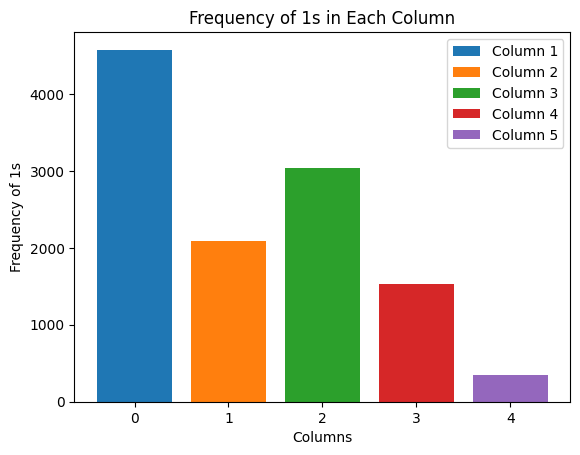

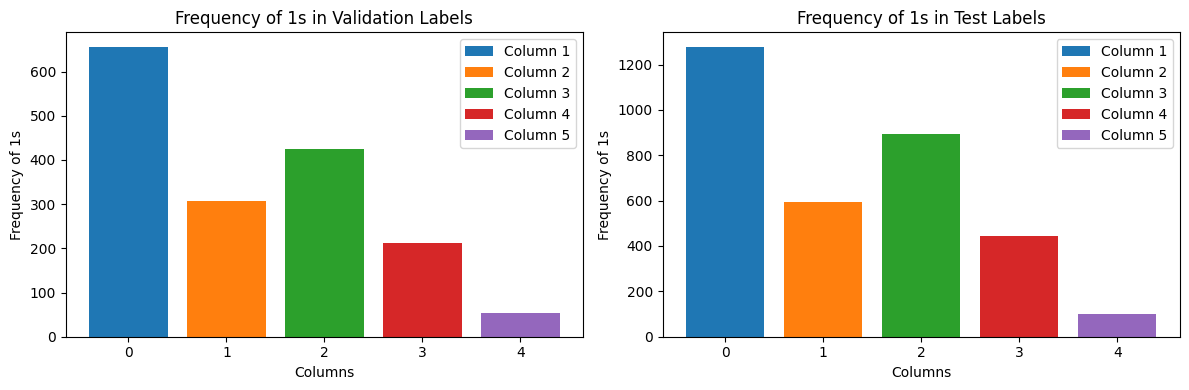

In [ ]:
num_columns = train_labels.shape[1]

for col in range(num_columns):
    column_frequencies = np.sum(train_labels[:, col])

    plt.bar([col], [column_frequencies], label=f'Column {col + 1}')

plt.xlabel("Columns")
plt.ylabel("Frequency of 1s")
plt.title("Frequency of 1s in Each Column")
plt.xticks(range(num_columns))
plt.legend()
plt.show()


num_columns = val_labels.shape[1]

# Create bar graphs for val_labels
plt.figure(figsize=(12, 4))
for col in range(num_columns):
    column_frequencies = np.sum(val_labels[:, col])

    plt.subplot(1, 2, 1)  # Subplot for val_labels
    plt.bar([col], [column_frequencies], label=f'Column {col + 1}')

plt.xlabel("Columns")
plt.ylabel("Frequency of 1s")
plt.title("Frequency of 1s in Validation Labels")
plt.xticks(range(num_columns))
plt.legend(loc='upper right')

# Create bar graphs for test_labels
for col in range(num_columns):
    column_frequencies = np.sum(test_labels[:, col])

    plt.subplot(1, 2, 2)  # Subplot for test_labels
    plt.bar([col], [column_frequencies], label=f'Column {col + 1}')

plt.xlabel("Columns")
plt.ylabel("Frequency of 1s")
plt.title("Frequency of 1s in Test Labels")
plt.xticks(range(num_columns))
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


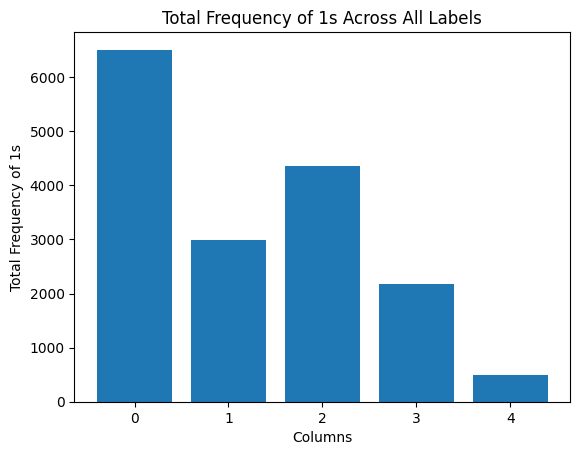

In [ ]:
# Combine all labels (train, validation, and test)
all_labels = np.vstack((train_labels, val_labels, test_labels))

# Calculate the total frequency of 1s
total_frequencies = np.sum(all_labels, axis=0)

# Create a bar graph to visualize the total frequencies
num_columns = all_labels.shape[1]

plt.bar(range(num_columns), total_frequencies)
plt.xlabel("Columns")
plt.ylabel("Total Frequency of 1s")
plt.title("Total Frequency of 1s Across All Labels")
plt.xticks(range(num_columns))
plt.show()


In [ ]:
# Print frequency of 1 for each column
for i in range(all_labels.shape[1]):
    column_frequency = np.sum(all_labels[:, i])
    print(f"Frequency in column {i+1} = {column_frequency}")


Frequency in column 1 = 6509.0
Frequency in column 2 = 2990.0
Frequency in column 3 = 4350.0
Frequency in column 4 = 2182.0
Frequency in column 5 = 502.0


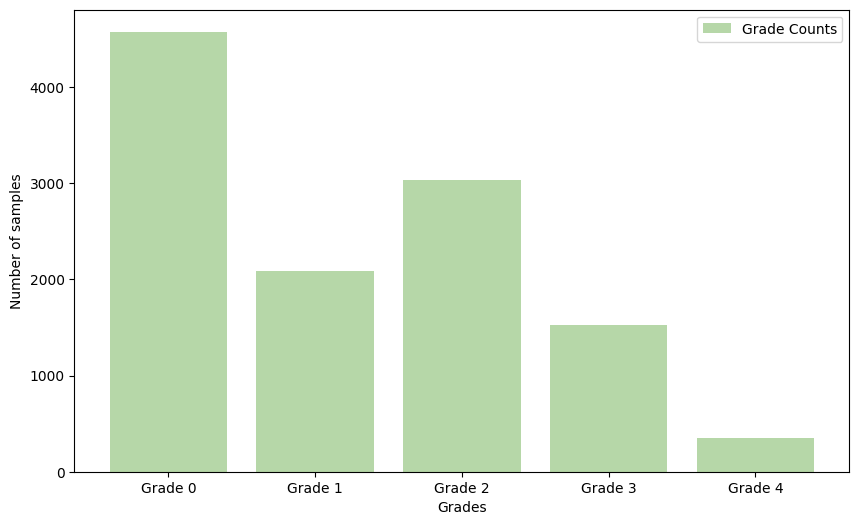

In [ ]:
# Count occurrences for each grade
grade_counts = np.sum(train_labels, axis=0)

# Bar plot
grades = [f"Grade {i}" for i in range(len(grade_counts))]
plt.figure(figsize=(10, 6))
plt.bar(grades, grade_counts, color="#b6d7a8", label="Grade Counts")
plt.ylabel('Number of samples')
plt.xlabel("Grades")
plt.legend()
plt.show()